In [52]:
%matplotlib notebook
import pandas as pd
import numpy as np
import pydicom
import skimage
import matplotlib.pyplot as plt

#### First, read in your dataframe of images with bounding box coordinates

In [53]:
bbox = pd.read_csv('bounding_boxes.csv')
bbox

,Unnamed: 0,Image Index,Finding Label,Bbox [x,y,w,h]
0,583,dicom_00023075_033.dcm,Mass,239.502222,535.077934,72.817778,65.991111
1,584,dicom_00029579_005.dcm,Mass,609.280000,189.193490,73.955556,71.680000
2,585,dicom_00013659_019.dcm,Mass,559.217778,167.575712,102.400000,136.533333


#### For each of the three DICOM files listed in the dataframe, do the following: 
1. Read the DICOM's pixel_array attribute into a dataframe using the pydicom.dcmread function
2. Visualize the image using plt.imshow
3. Plot a histogram of the image pixel intensity values
4. Find the mean and standard deviation of intensity values of the image, and standardize it using the standardization formula:
```test
(X - X_mean)/X_std_dev
```

5. Re-plot a histogram of the normalized intensity values
6. Use the coordinates in the dataframe that tell the starting x & y values, and the width and height of the mass to plot visualize only the mass using plt.imshow
7. Plot a histogram of the normalized intensity values of the mass

In [54]:
##Read the DICOM's pixel_array attribute into a dataframe using 
##the pydicom.dcmread function

img33_file = pydicom.dcmread("dicom_00023075_033.dcm")
img05_file = pydicom.dcmread("dicom_00029579_005.dcm")
img19_file = pydicom.dcmread("dicom_00013659_019.dcm")


<IPython.core.display.Javascript object>


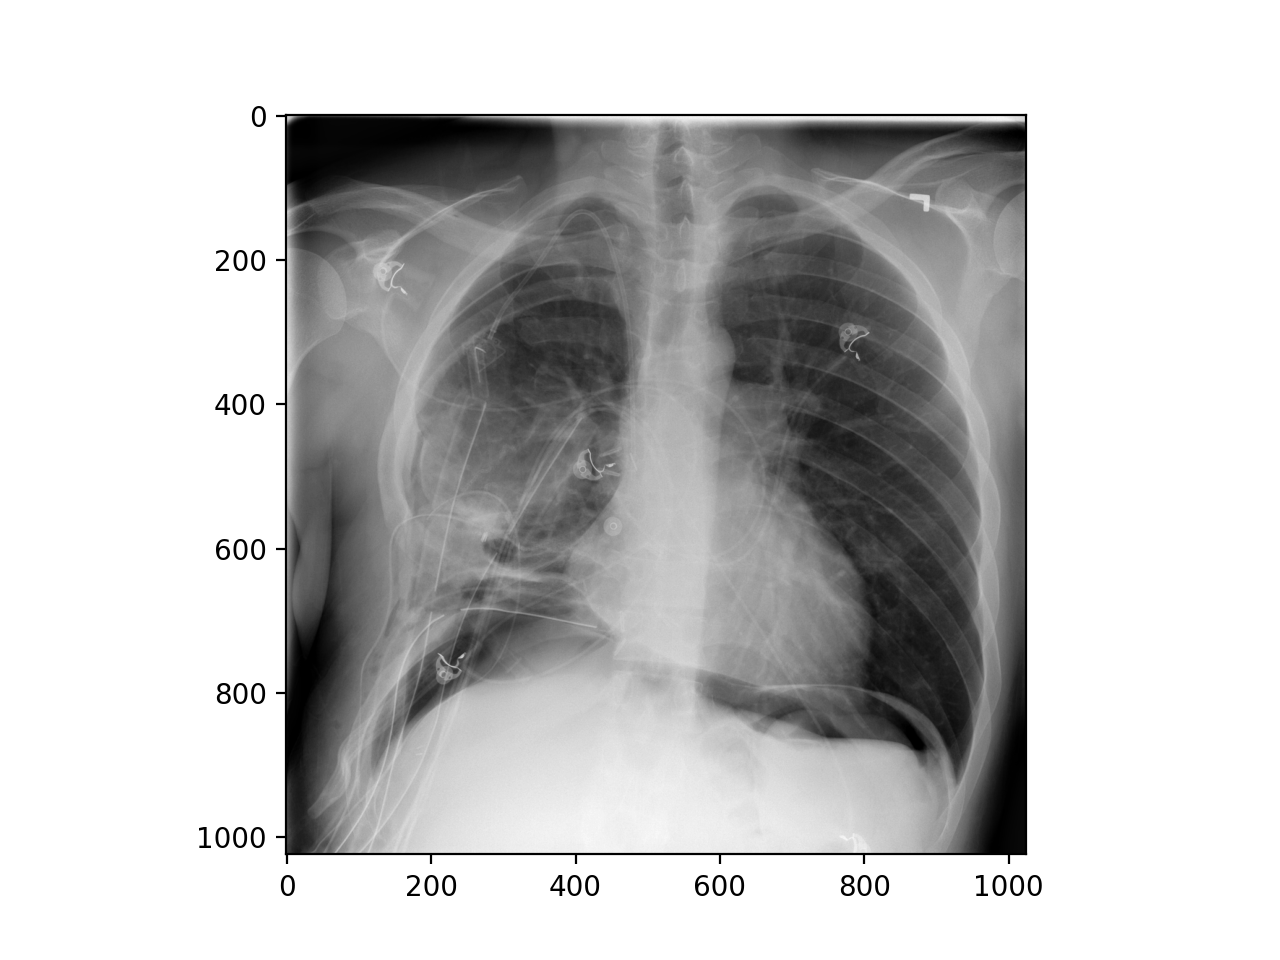

In [55]:
##Visualize the image using plt.imshow

img33 = img33_file.pixel_array
plt.imshow(img33, cmap = 'gray')

<IPython.core.display.Javascript object>


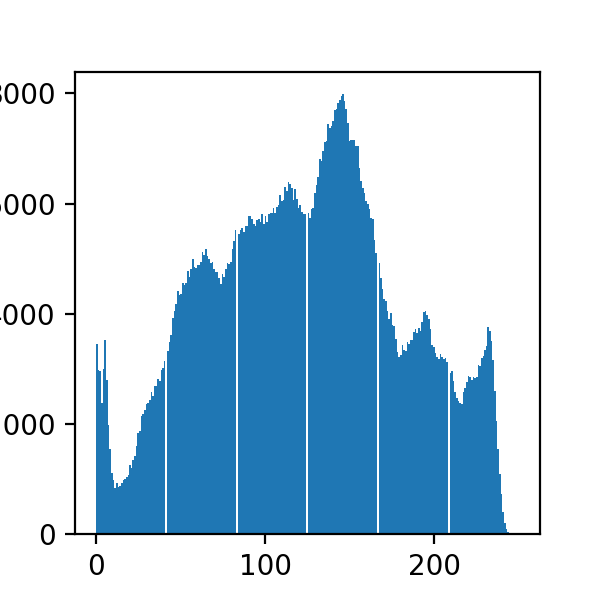

(array([3.455e+03, 2.969e+03, 2.961e+03, 2.387e+03, 2.990e+03, 3.522e+03,
        2.789e+03, 1.972e+03, 1.539e+03, 1.108e+03, 9.850e+02, 8.390e+02,
        9.200e+02, 8.530e+02, 8.690e+02, 9.220e+02, 9.840e+02, 9.930e+02,
        1.031e+03, 1.071e+03, 1.255e+03, 1.202e+03, 1.335e+03, 1.412e+03,
        1.592e+03, 1.835e+03, 1.862e+03, 2.141e+03, 2.182e+03, 2.248e+03,
        2.357e+03, 2.380e+03, 2.433e+03, 2.570e+03, 2.504e+03, 2.684e+03,
        2.679e+03, 2.814e+03, 2.777e+03, 2.970e+03, 3.013e+03, 3.145e+03,
        0.000e+00, 3.320e+03, 3.488e+03, 3.615e+03, 3.928e+03, 4.042e+03,
        4.177e+03, 4.408e+03, 4.334e+03, 4.363e+03, 4.550e+03, 4.525e+03,
        4.557e+03, 4.777e+03, 4.673e+03, 4.804e+03, 4.987e+03, 4.852e+03,
        4.824e+03, 4.876e+03, 4.877e+03, 4.940e+03, 5.113e+03, 5.074e+03,
        5.173e+03, 5.038e+03, 4.991e+03, 4.918e+03, 4.938e+03, 4.806e+03,
        4.755e+03, 4.764e+03, 4.647e+03, 4.530e+03, 4.712e+03, 4.671e+03,
        4.816e+03, 4.924e+03, 4.898e+0

In [56]:
##Plot a histogram of the image pixel intensity values
plt.figure(figsize=(3,3))
plt.hist(img33_file.pixel_array.ravel(), bins = 256)

In [57]:
##Find the mean and standard deviation of intensity values of the image, 
##and standardize it using the standardization formula:
##abs(X - X_mean)/X_std_dev

mean_intensity33 = np.mean(img33_file.pixel_array)
stdev_intensity33 = np.std(img33_file.pixel_array)

In [58]:
normalized33 = ((img33_file.pixel_array) - mean_intensity33)/stdev_intensity33

<IPython.core.display.Javascript object>


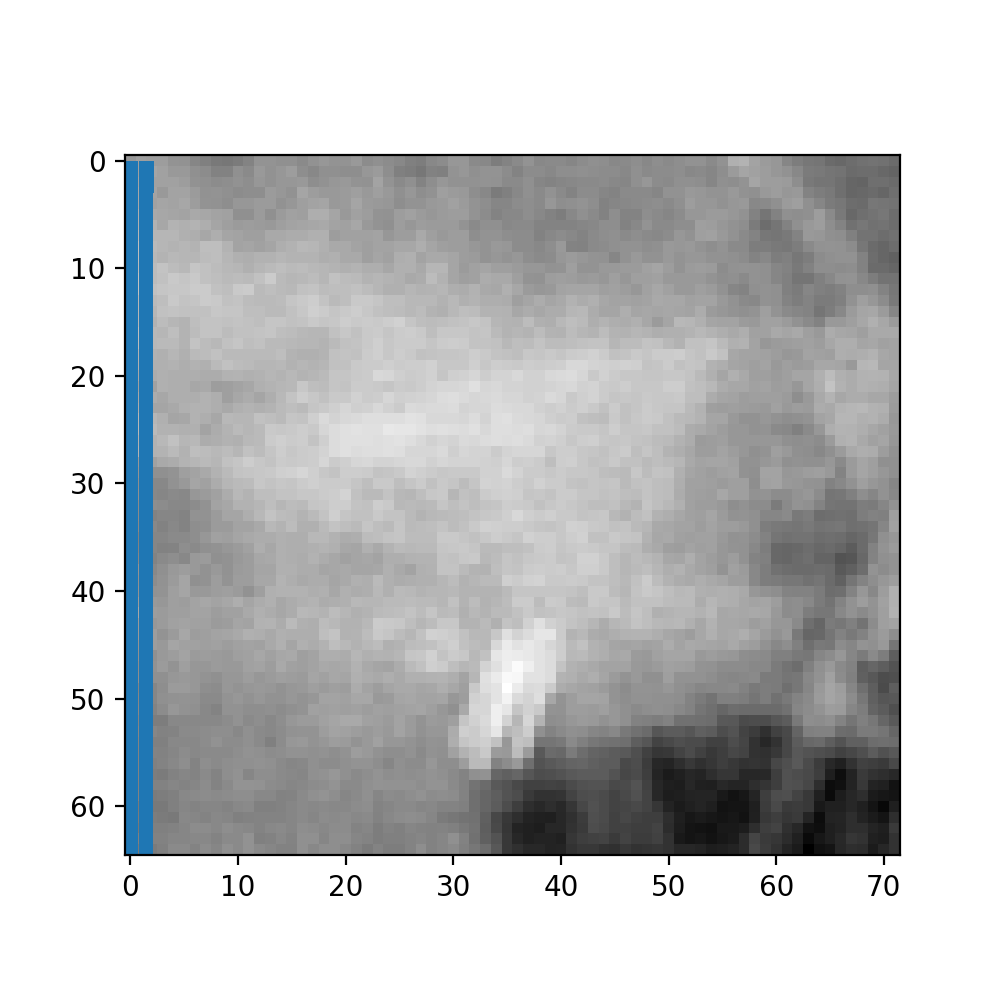

(array([3.455e+03, 2.969e+03, 2.961e+03, 2.387e+03, 2.990e+03, 3.522e+03,
        2.789e+03, 1.972e+03, 1.539e+03, 1.108e+03, 9.850e+02, 8.390e+02,
        9.200e+02, 8.530e+02, 8.690e+02, 9.220e+02, 9.840e+02, 9.930e+02,
        1.031e+03, 1.071e+03, 1.255e+03, 1.202e+03, 1.335e+03, 1.412e+03,
        1.592e+03, 1.835e+03, 1.862e+03, 2.141e+03, 2.182e+03, 2.248e+03,
        2.357e+03, 2.380e+03, 2.433e+03, 2.570e+03, 2.504e+03, 2.684e+03,
        2.679e+03, 2.814e+03, 2.777e+03, 2.970e+03, 3.013e+03, 3.145e+03,
        0.000e+00, 3.320e+03, 3.488e+03, 3.615e+03, 3.928e+03, 4.042e+03,
        4.177e+03, 4.408e+03, 4.334e+03, 4.363e+03, 4.550e+03, 4.525e+03,
        4.557e+03, 4.777e+03, 4.673e+03, 4.804e+03, 4.987e+03, 4.852e+03,
        4.824e+03, 4.876e+03, 4.877e+03, 4.940e+03, 5.113e+03, 5.074e+03,
        5.173e+03, 5.038e+03, 4.991e+03, 4.918e+03, 4.938e+03, 4.806e+03,
        4.755e+03, 4.764e+03, 4.647e+03, 4.530e+03, 4.712e+03, 4.671e+03,
        4.816e+03, 4.924e+03, 4.898e+0

In [59]:
##Re-plot a histogram of the normalized intensity values
plt.figure(figsize = (5,5))
plt.hist(normalized33.ravel(),bins=256)

In [61]:
##Use the coordinates in the dataframe that tell the starting x & y 
##values, and the width and height of the mass, to plot visualize only 
##the mass using plt.imshow

plt.imshow(img33[535:(535+65),239:(239+72)], cmap = 'gray')

In [ ]:
##Plot a histogram of the normalized intensity values of the mass

plt.figure(figsize=(5,5))
plt.hist(normalized33[535:(535+65),239:(239+72)].ravel(),bins = 256)